In [1]:
from sklearn.model_selection import train_test_split
from data_preprocessing import data_prep
df = data_prep()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20843 entries, 0 to 22222
Data columns (total 88 columns):
AGE                    20843 non-null int32
BILL                   20843 non-null float64
ORGYN                  20843 non-null int64
AFFL                   20843 non-null float64
LTIME                  20843 non-null float64
TV_REG_Border          20843 non-null uint8
TV_REG_C Scotland      20843 non-null uint8
TV_REG_East            20843 non-null uint8
TV_REG_London          20843 non-null uint8
TV_REG_Midlands        20843 non-null uint8
TV_REG_N East          20843 non-null uint8
TV_REG_N Scot          20843 non-null uint8
TV_REG_N West          20843 non-null uint8
TV_REG_S & S East      20843 non-null uint8
TV_REG_S West          20843 non-null uint8
TV_REG_Wales & West    20843 non-null uint8
TV_REG_Yorkshire       20843 non-null uint8
NGROUP_A               20843 non-null uint8
NGROUP_B               20843 non-null uint8
NGROUP_C               20843 non-null uint8
NGROU

In [2]:
#TARGET/IMPUT SPLIT
y = df["ORGYN"]
X = df.drop(["ORGYN"], axis = 1)

#SETTING RANDOM STATE
rs = 10

#DATA PARTITION
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size = 0.3, stratify = y, random_state = rs)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#SIMPLE DECISION TREE TRAINING
model = DecisionTreeClassifier(random_state = rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [30]:
print("Train accuracy", model.score(X_train, y_train))
print("Test accuracy", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy 0.9211788896504455
Test accuracy 0.7615544538621462
             precision    recall  f1-score   support

          0       0.82      0.88      0.85      4713
          1       0.52      0.40      0.46      1540

avg / total       0.75      0.76      0.75      6253



In [6]:
import numpy as np 
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis = 0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ":", importances[i])

AGE : 0.27896163818724967
AFFL : 0.1375183953702538
BILL : 0.09772346103258264
LTIME : 0.09078717503397662
CLASS_Tin : 0.01315417748552768


In [35]:
model = DecisionTreeClassifier(max_depth = ,random_state = rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

SyntaxError: invalid syntax (<ipython-input-35-10f311b04de0>, line 1)

In [36]:
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis = 0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ":", importances[i])

#DT VISUALIZATION
import pydot 
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(model, out_file = dotfile, feature_names = X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("assignment_dt.png")

AGE : 0.32185548606890746
AFFL : 0.1750537479503976
BILL : 0.09643217379600698
LTIME : 0.07137429756799579
TV_REG_Midlands : 0.01204123280401711
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.428747 to fit



True

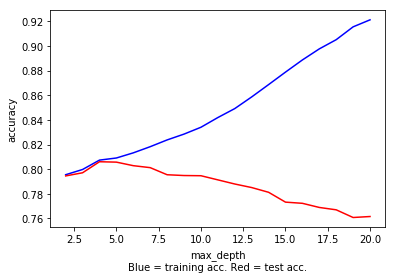

In [37]:
import matplotlib.pyplot as plt

test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [38]:
#GridSearchCV1

from sklearn.model_selection import GridSearchCV

params = {'criterion': ["gini", "entropy"],
          "max_depth": range(2,7),
          "min_samples_leaf": range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8073337902673063
Test accuracy: 0.806332960179114
             precision    recall  f1-score   support

          0       0.83      0.93      0.88      4713
          1       0.67      0.42      0.51      1540

avg / total       0.79      0.81      0.79      6253

{'max_depth': 4, 'min_samples_leaf': 20, 'criterion': 'gini'}


In [41]:
#GridSearchCV2

params = {'criterion': ["gini", "entropy"],
          "max_depth": range(2,6),
          "min_samples_leaf": range(1, 10)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8073337902673063
Test accuracy: 0.8060131137054214
             precision    recall  f1-score   support

          0       0.83      0.93      0.88      4713
          1       0.67      0.41      0.51      1540

avg / total       0.79      0.81      0.79      6253

{'max_depth': 4, 'min_samples_leaf': 8, 'criterion': 'gini'}


In [67]:
from data_preprocessing import analyse_feature_importance

analyse_feature_importance(cv.best_estimator_, X.columns, 5)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")

ImportError: cannot import name 'analyse_feature_importance'

In [46]:
importances = cv.best_estimator_.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis = 0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ":", importances[i])

#DT VISUALIZATION

dotfile = StringIO()
export_graphviz(cv.best_estimator_, out_file = dotfile, feature_names = X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("assignment_optimal_dt.png")

AGE : 0.6069759598218176
AFFL : 0.3886546467283799
BILL : 0.0022975291513298653
NEIGHBORHOOD_18.0 : 0.002071864298472725
NEIGHBORHOOD_10.0 : 0.0


True